# ROHAN T 

# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset

In [2]:
df = pd.read_csv(r"C:\Users\ROHAN\Desktop\Oasis Infobyte\Task 1 Iris classification\DATA\Iris.csv")

# Checking how the dataset looks

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# To make a basic understanding about data we use describe 

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.skew()

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_2892\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

# Then we check for Null values in the dataset

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Duplicates must also be checked and removed if any

In [8]:
df.duplicated().sum()

0

# We can use boxplot to check for outliers

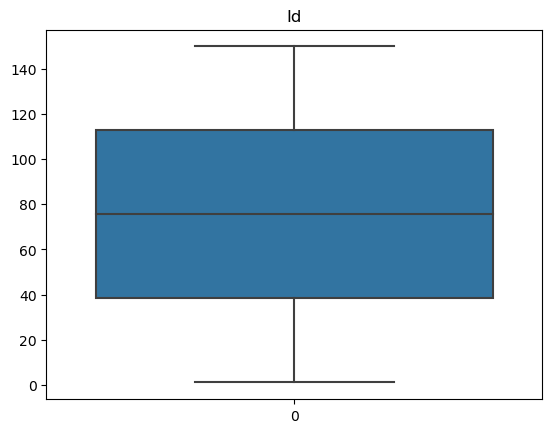

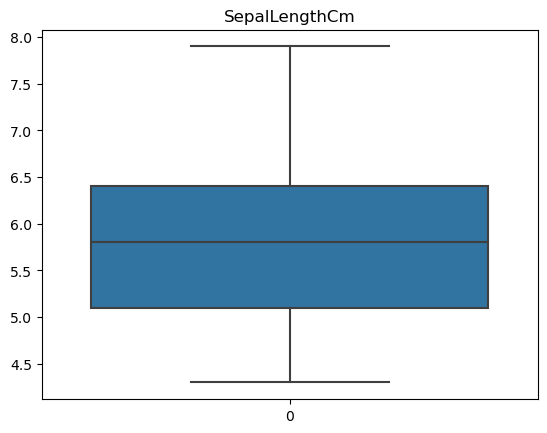

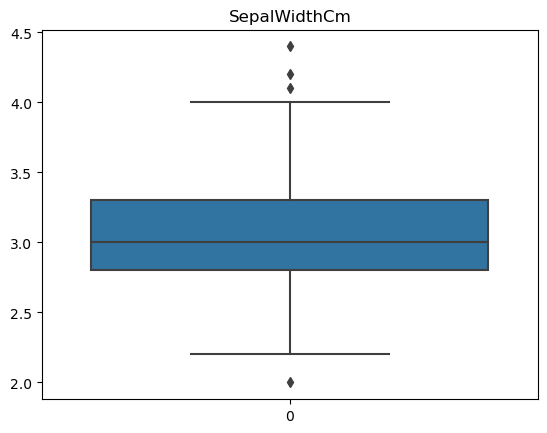

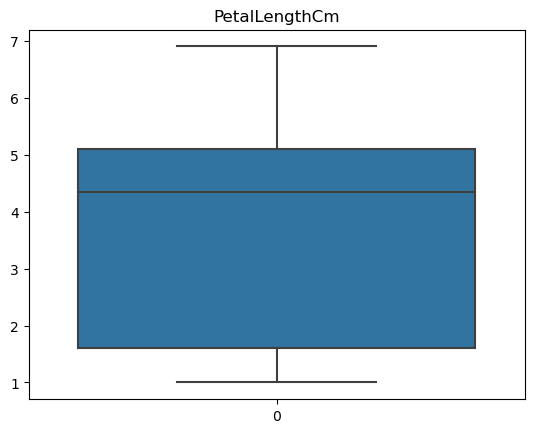

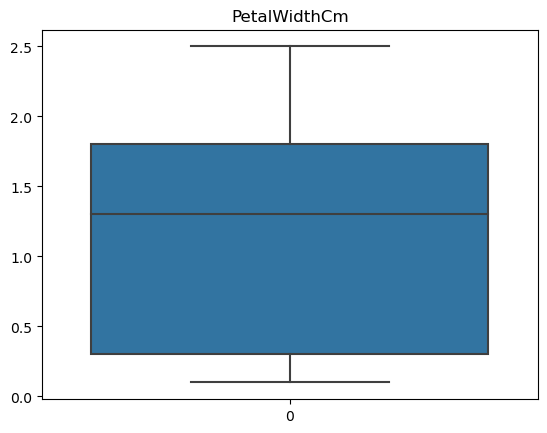

Categorical


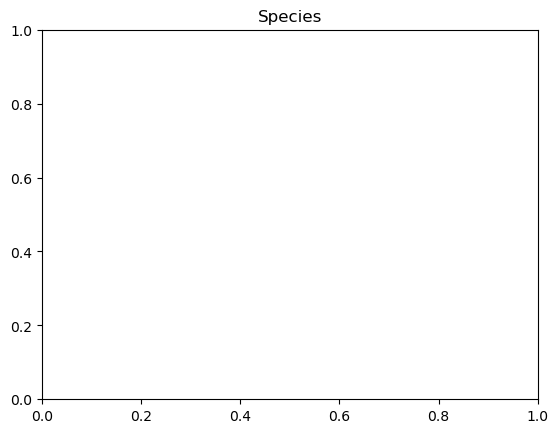

In [9]:
try:
    for i in df:
        plt.title(i)
        sns.boxplot(data=df[i])
        plt.show()
except:
    Exception
    print('Categorical')

# There are some outliers in SepalWidthCm

In [10]:
q1 = df.SepalWidthCm.quantile(0.25)
q3 = df.SepalWidthCm.quantile(0.75)
IQR = q3 - q1

In [11]:
UL = q3+1.5*IQR
LL = q1-1.5*IQR

In [12]:
data = df[(df.SepalWidthCm>LL) & (df.SepalWidthCm<UL)]

# All the outliers must be removed

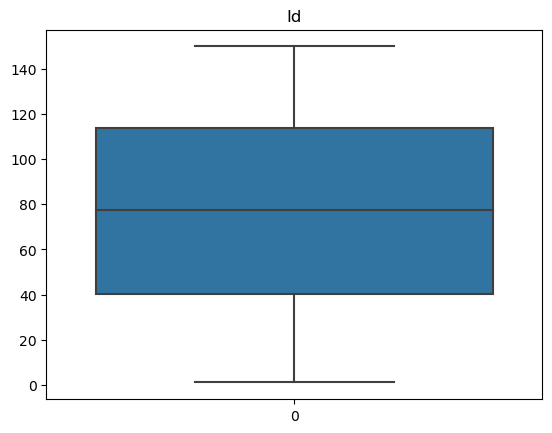

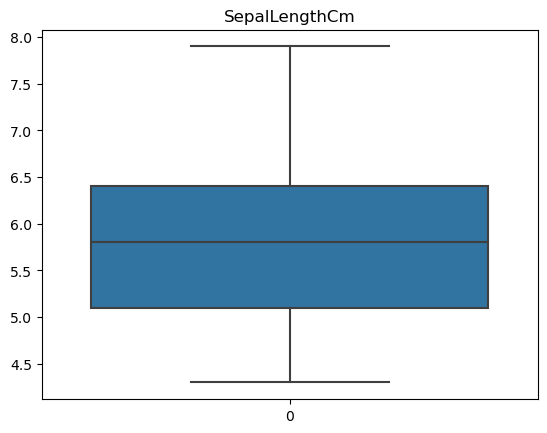

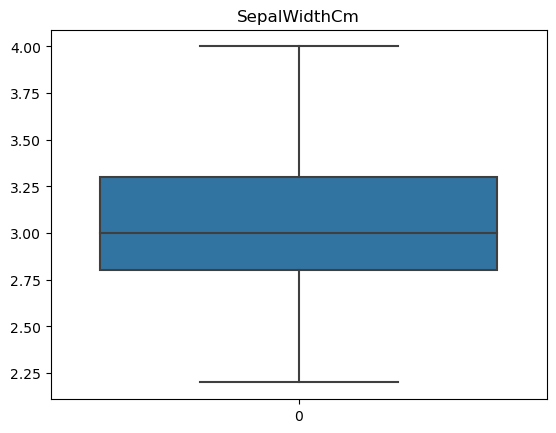

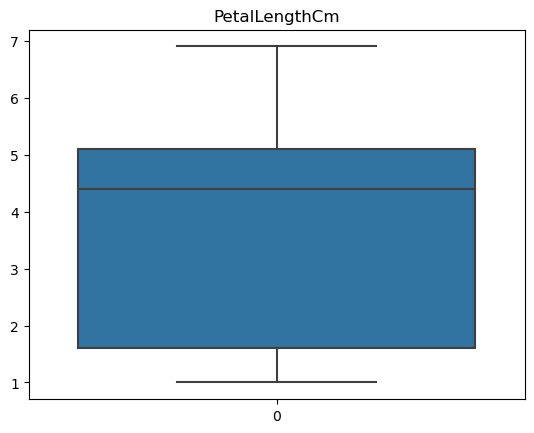

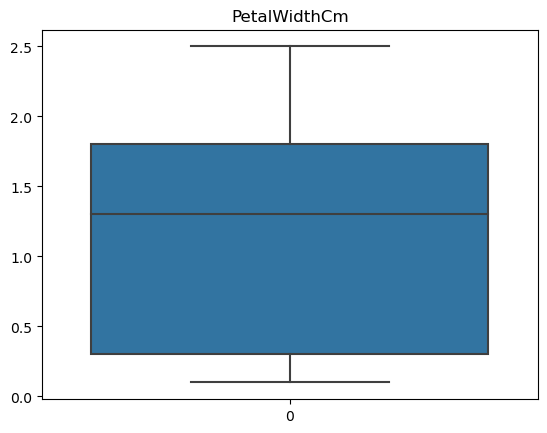

Categorical


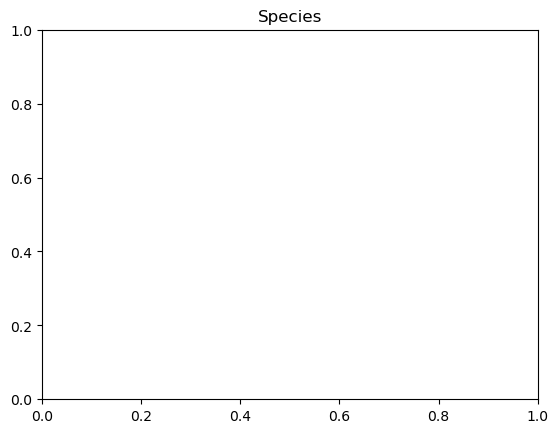

In [13]:
try:
    for i in data:
        plt.title(i)
        sns.boxplot(data=data[i])
        plt.show()
except:
    Exception
    print('Categorical')

# Some visualizations can be done

[]

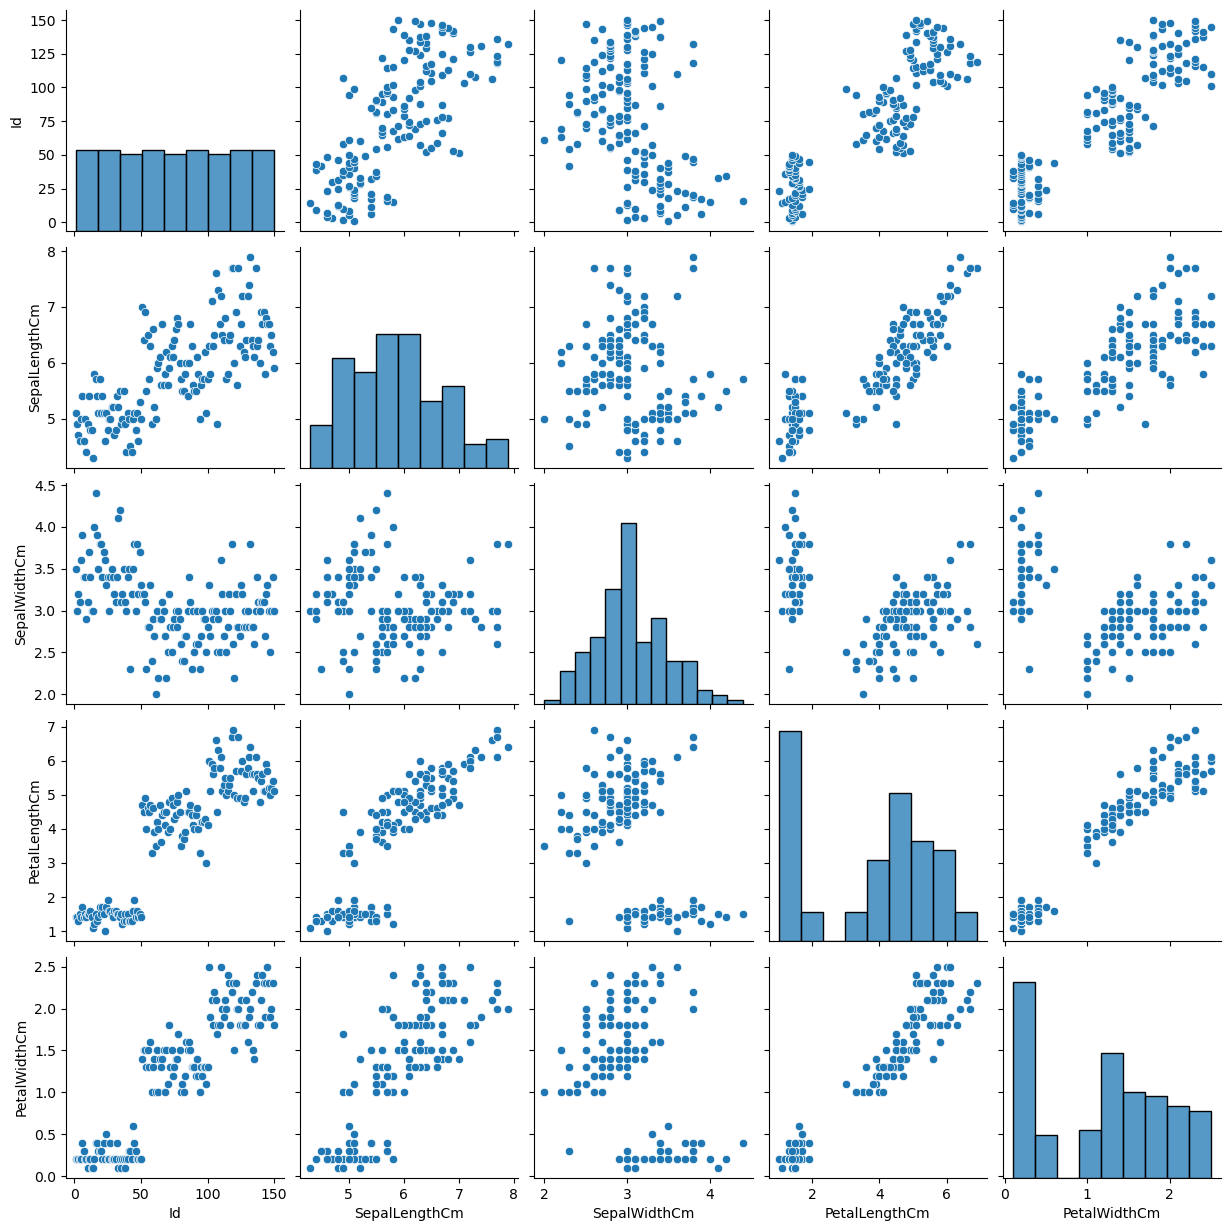

In [14]:
sns.pairplot(data=df)
plt.plot()

# Heatmaps can show the correlation between each attributes

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_2892\1362094776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


[]

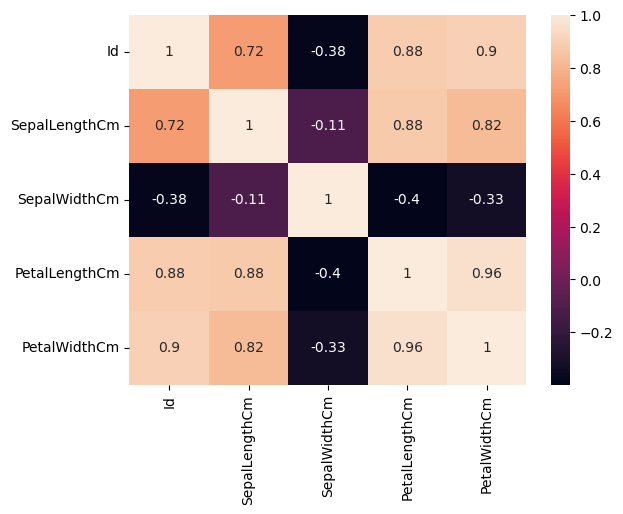

In [15]:
sns.heatmap(data.corr(),annot=True)
plt.plot()

# The distribution of each species is shown below

<Axes: xlabel='Species', ylabel='count'>

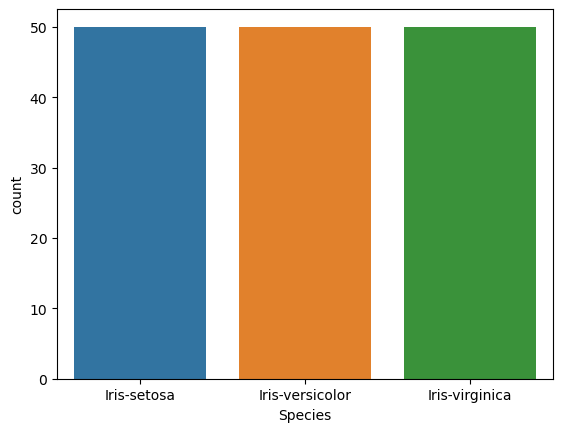

In [16]:
sns.countplot(data=df,x='Species')

# Modelling

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [19]:
data['Species']=encoder.fit_transform(data['Species'])
data

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_2892\3255466235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species']=encoder.fit_transform(data['Species'])


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# The dataset is split as training and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = data.drop(['Species','Id'],axis=1)
y=data['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# I am using KNN for classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(44, 4)
(102,)
(44,)


In [25]:
y_pred = knn.predict(x_test)
print(y_pred)

[1 2 1 2 0 0 0 0 1 2 1 0 0 0 1 1 1 2 0 0 2 2 0 0 1 1 1 2 0 2 2 1 0 0 2 1 2
 0 1 2 1 2 0 0]


# Model evaluation

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print(accuracy_score(y_test,y_pred))

0.9318181818181818


# We can use a test set to check if the model is working

In [28]:
print(knn.predict([[6.5,3.0,5.2,2.0]]))

[2]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
from sklearn import metrics
print("MAR:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("R-Squared",metrics.r2_score(y_pred,y_test))

MAR: 0.06818181818181818
RMSE: 0.26111648393354675
R-Squared 0.8987730061349694
